In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from model import DNNModel

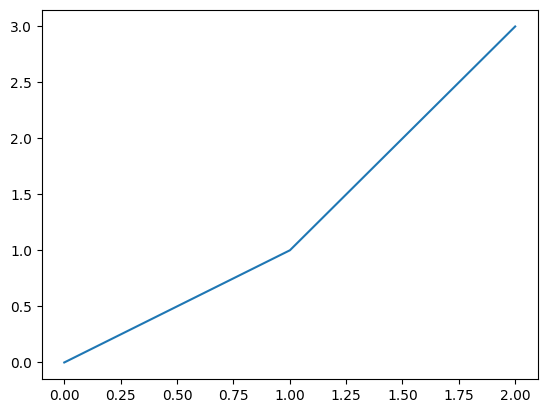

In [2]:
def gen_data(x):
    '''        
        y = x0 if x0<=1
        y = 2x0-1 if x0>1
    '''
    return (x[:,0] <= 1) * x[:,0] + (x[:,0] > 1) * (x[:,0] * 2 - 1)
x = np.linspace(0,2,1000).reshape(-1,1)
y = gen_data(x)
plt.plot(x.reshape(-1),y)

In [3]:
np.random.seed(815)
X_train = np.random.rand(100000,128)*1.2
y_train = gen_data(X_train)

X_test = (np.random.rand(100,128)+0.5)*1.2
y_test = gen_data(X_test)

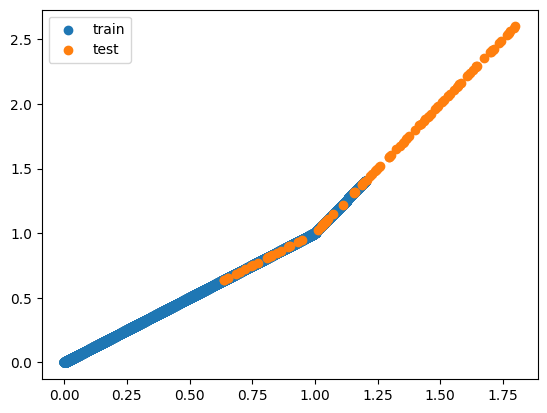

In [4]:
plt.scatter(X_train[:,0],y_train)
plt.scatter(X_test[:,0], y_test)
plt.legend(['train', 'test'])

In [5]:
hidden_layers = [{'dim': 64, 'activation': tf.nn.relu},
                 {'dim': 32, 'activation': tf.nn.relu},]
classic_dlmodel = DNNModel(input_dim=128, hidden_layers=hidden_layers, output_dim=1)

from tensorflow_addons.metrics import RSquare
classic_dlmodel.build(metrics=[tf.keras.metrics.MeanSquaredError(), RSquare()])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 10369 (40.50 KB)
Trainable params: 10369 (40.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


/Users/yuchen.jiang2/personal/repos/playground/env/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [6]:
classic_dlmodel.fit(X_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
625/625 [==============================] - 1s 863us/step - loss: 0.0284 - mean_squared_error: 0.0284 - r_square: 0.7961 - val_loss: 0.0016 - val_mean_squared_error: 0.0016 - val_r_square: 0.9885
Epoch 2/10
625/625 [==============================] - 0s 741us/step - loss: 0.0017 - mean_squared_error: 0.0017 - r_square: 0.9878 - val_loss: 0.0017 - val_mean_squared_error: 0.0017 - val_r_square: 0.9877
Epoch 3/10
625/625 [==============================] - 0s 734us/step - loss: 0.0018 - mean_squared_error: 0.0018 - r_square: 0.9870 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - val_r_square: 0.9893
Epoch 4/10
625/625 [==============================] - 0s 739us/step - loss: 0.0016 - mean_squared_error: 0.0016 - r_square: 0.9884 - val_loss: 0.0014 - val_mean_squared_error: 0.0014 - val_r_square: 0.9897
Epoch 5/10
625/625 [==============================] - 0s 724us/step - loss: 0.0017 - mean_squared_error: 0.0017 - r_square: 0.9881 - val_loss: 0.0020 - val_mean_squared_error: 

In [22]:
y_train_pred = classic_dlmodel.predict(X_train).reshape(-1)
y_test_pred = classic_dlmodel.predict(X_test).reshape(-1)

4/4 [==============================] - 0s 536us/step


In [23]:
print(f'mean squared error on train set: {np.mean((y_train_pred - y_train) ** 2)}')
print(f'mean squared error on test set: {np.mean((y_test_pred - y_test) ** 2)}')

mean squared error on train set: 0.0008752846544038065
mean squared error on test set: 0.12601165207736575


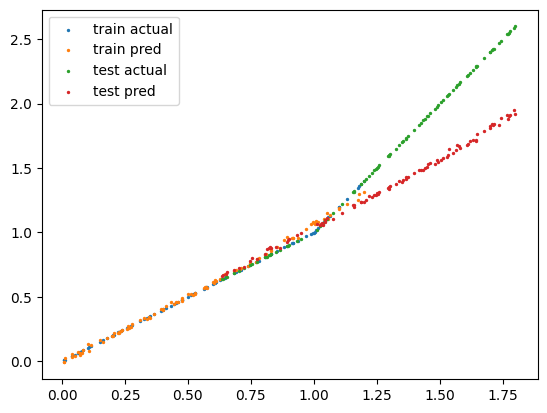

In [42]:
plt.scatter(X_train[:100,0], y_train[:100], s=2)
plt.scatter(X_train[:100,0], y_train_pred[:100], s=2)

plt.scatter(X_test[:,0], y_test, s=2)
plt.scatter(X_test[:,0], y_test_pred, s=2)
plt.legend(['train actual', 'train pred', 'test actual', 'test pred'])